In [ ]:
!pip uninstall -y tensorflow
!pip uninstall -y tensorflow-cpu tensorflow-gpu


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow import keras
print(keras.__version__)

2.12.0


In [ ]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sdir=r'/content/drive/MyDrive/ttv_plants'
files=glob.glob(sdir+'/**/*.jpg',recursive=True)
print(len(files))

30000


In [ ]:
#train_dir=sdir+'/Train_Set_Folder'
#valid_dir=sdir+'/Validation_Set_Folder'
#test_dir=sdir+'/Test_Set_Folder'

In [ ]:
train_dir=r'/content/drive/MyDrive/ttv_plants/Train_Set_Folder'
valid_dir=r'/content/drive/MyDrive/ttv_plants/Validation_Set_Folder'
test_dir=r'/content/drive/MyDrive/ttv_plants/Test_Set_Folder'

In [ ]:
max_images=150
filepaths=[]
labels=[]
classes=sorted(os.listdir(train_dir))
class_count=len(classes)
for klass in classes:
  classpath=os.path.join(train_dir,klass)
  flist=sorted(os.listdir(classpath))
  for i,f in enumerate(flist):
    if i<max_images:
      fpath=os.path.join(classpath,f)
      filepaths.append(fpath)
      labels.append(klass)
    else:
      break

In [ ]:
Fseries=pd.Series(filepaths,name='filepaths')
Lseries=pd.Series(labels,name='labels')
df=pd.concat([Fseries,Lseries],axis=1)

In [ ]:
train_df,dummy_df=train_test_split(df,train_size=0.8,shuffle=True,random_state=123,stratify=df['labels'])
valid_df,test_df=train_test_split(dummy_df,train_size=0.5,shuffle=True,random_state=123,stratify=dummy_df['labels'])


In [ ]:
print('train_df length:',len(train_df))
print('valid_df length:',len(valid_df))
print('test_df length:',len(test_df))

train_df length: 3600
valid_df length: 450
test_df length: 450


In [ ]:
print('the number of classes in the dataset is:',class_count)

the number of classes in the dataset is: 30


In [ ]:
groups=train_df.groupby('labels')
print('{0:^30s}{1:^13s}'.format('CLASS','IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
  group=groups.get_group(label)
  countlist.append(len(group))
  classlist.append(label)
  print('{0:^30s} {1:^13s}'.format(label,str(len(group))))

            CLASS              IMAGE COUNT 
           aloevera                 120     
            banana                  120     
           bilimbi                  120     
          cantaloupe                120     
           cassava                  120     
           coconut                  120     
             corn                   120     
           cucumber                 120     
           curcuma                  120     
           eggplant                 120     
           galangal                 120     
            ginger                  120     
            guava                   120     
             kale                   120     
          longbeans                 120     
            mango                   120     
            melon                   120     
            orange                  120     
            paddy                   120     
            papaya                  120     
         peper chili                120     
          p

In [ ]:
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classes[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classes[min_index]
print('the class with the maximum number of images is:',max_class)
print('the class with the minimum number of images is:',min_class)
ht=0
wt=0
train_df_sample=train_df.sample(n=100,random_state=123,axis=0)
for i in range(len(train_df_sample)):
  fpath=train_df_sample['filepaths'].iloc[i]
  img=cv2.imread(fpath)
  shape=img.shape
  ht+=shape[0]
  wt+=shape[1]
  print('average height=',ht//100,'average width=',wt//100,'aspect ratio=',ht/wt)

the class with the maximum number of images is: aloevera
the class with the minimum number of images is: aloevera
average height= 1 average width= 3 aspect ratio= 0.5225806451612903
average height= 15 average width= 23 aspect ratio= 0.6473864610111397
average height= 17 average width= 29 aspect ratio= 0.6022192333557498
average height= 24 average width= 38 aspect ratio= 0.625845033801352
average height= 25 average width= 41 aspect ratio= 0.6284882310118903
average height= 29 average width= 44 aspect ratio= 0.655257824814231
average height= 30 average width= 47 aspect ratio= 0.649367088607595
average height= 34 average width= 55 aspect ratio= 0.6175363098440022
average height= 36 average width= 58 aspect ratio= 0.6145992853496682
average height= 38 average width= 61 aspect ratio= 0.6288102261553589
average height= 42 average width= 64 aspect ratio= 0.6564445828144458
average height= 44 average width= 66 aspect ratio= 0.6600329193475983
average height= 51 average width= 79 aspect ratio= 

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Now, you can use flow_from_dataframe:
img_size = (200,260)
working_dir = r'./'
batch_size = 20
trgen = ImageDataGenerator(horizontal_flip=True, rotation_range=20,zoom_range=0.2)
t_and_v_gen = ImageDataGenerator()
msg = '{0:70s} for train generator'.format('')
print(msg, '\r', end='')
train_gen = trgen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    color_mode='rgb',
)
msg = '{0:70s} for validation generator'.format('')
print(msg, '\r', end='')
valid_gen = t_and_v_gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    color_mode='rgb',
)

Found 3600 validated image filenames belonging to 30 classes.
Found 450 validated image filenames belonging to 30 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (your existing code) ...

# Define t_and_v_gen as an ImageDataGenerator instance
t_and_v_gen = ImageDataGenerator(
    # (Add any desired data augmentation parameters here)
)
length = len(valid_df)
# Define test_batch_size before using it
test_batch_size = sorted([int(length/n) for n in range(1,length+1) if length % n==0 and length/n<=80],reverse=True)[0] # Or any other desired batch size

test_gen = t_and_v_gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    batch_size=test_batch_size,
    shuffle=False,
    class_mode='categorical',
    color_mode='rgb',
)

Found 450 validated image filenames belonging to 30 classes.


In [ ]:
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels

# Calculate test_steps based on the size of the validation data and batch size
test_steps = len(valid_df) // test_batch_size  # valid_df should be the DataFrame for validation data

print('test size',test_batch_size,'test_steps:',test_steps,'number of classes:',class_count)

test size 75 test_steps: 6 number of classes: 30


In [ ]:
def show_img_samples(gen):
  t_dict=gen.class_indices
  classes=list(t_dict.keys())
  images,labels=next(gen)
  fig=plt.figure(figsize=(20,20))
  length=len(labels)
  if length<25:
    r=length
  else:
    r=25
  for i in range(r):
    plt.subplot(5,5,i+1)
    image=images[i]/255
    plt.imshow(image)
    index=np.argmax(labels[i])
    class_name=classes[index]
    plt.title(class_name,color='blue',fontsize=14)
    plt.axis('off')
  plt.show()

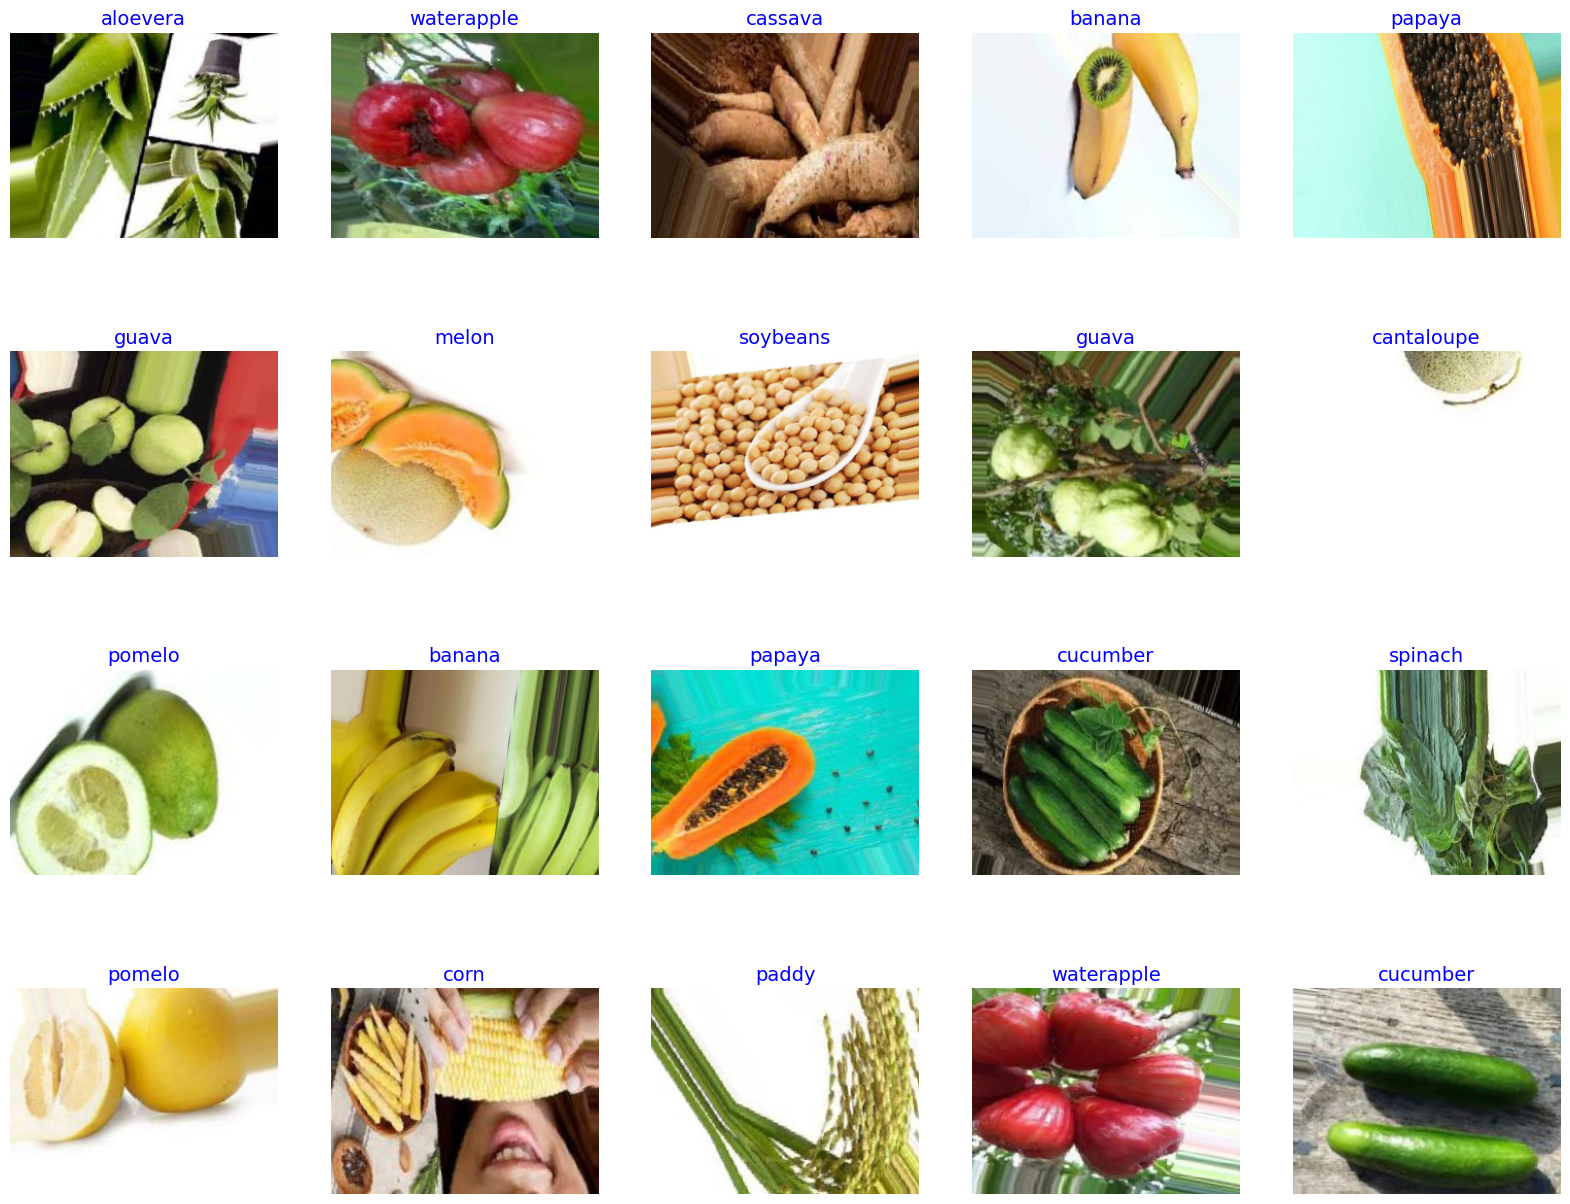

In [ ]:
show_img_samples(train_gen)

MODEL BUILDING


In [ ]:
length=len(test_df)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, MaxPooling2D, Flatten

img_shape=(img_size[0],img_size[1],3)
model_name='EfficientNetB3'
base_model=tf.keras.applications.EfficientNetB3(include_top=False,weights='imagenet',input_shape=img_shape)
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001)(x)
x=MaxPooling2D()(x)
# Flatten the output before the Dense layer
x = Flatten()(x)
# The l2 regularizer expects the regularization strength as a positional argument.
x=Dense(256,kernel_regularizer=regularizers.l2( 0.0016),activity_regularizer=regularizers.l1(0.0006),bias_regularizer=regularizers.l1(0.0006),activation='relu')(x)
x=Dropout(rate=0.2,seed=123)(x)
output=Dense(class_count,activation='softmax')(x)
# Use a different variable name to avoid overwriting the Model class
model = Model(inputs=base_model.input,outputs=output) # Changed 'Model' to 'model'

# Define the learning rate
lr = 0.001

model.compile(Adamax(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
class LR_ASK(keras.callbacks.Callback):
  def __init__(self, model, epochs, ask_epoch):
    super(LR_ASK, self).__init__()
    self.set_model(model)
    self.ask = ask_epoch
    self.epochs = epochs
    self.ask = True
    self.lowest_vloss = np.inf
    self.best_weights = self.model.get_weights()
    self.best_epoch = 1
    self.plist = []

    def get_list(self):
      return(self.plist)

    def on_train_begin(self,logs=None):
      if self.ask_epoch==0:
        print('you set ask_epoch=0, ask epoch will be set to 1',flush=True)
        self.ask_epoch=1
      if self.ask_epoch >=self.epochs:
        print('ask_epoch>=epochs, will train for',epochs,'epochs',flush=True)
      if self.epochs==1:
        self.ask=False
      else:
        print('Training will proceed until epoch',ask_epoch,'then you will be asked to')
        print('enter H to halt training or enter an integer for how many more epochs to run then be asked again')
        self.start_time.time()
    #self.model.set_weights(self.best_weights)
    #tr_duration=time.time()

def on_train_end(self,logs=None):
  print('loading model with weights from epoch',self.best_epoch)
  self.model.set_weights(self.best_weights)
  tr_duration=time.time()-self.start_time
  hours=tr_duration//3600
  minutes=(tr_duration-(hours*3600))//60
  seconds=tr_duration-((hours*3600)+(minutes*60))
  msg=f'training elapsed time was{str(hours)} hours,{minutes:4.1f} minutes,{seconds:4.2f} seconds'
  print(msg,flush=True)
  def on_epoch_end(self,epoch,logs=None):
    v_loss=logs.get('val_loss')
  if epoch>0:
    deltav=self.lowest_vloss-v_loss
    pimprov=(deltav/self.lowest_vloss)*100
    self.plist.append(pimprov)
  else:
    pimprov=0.0
  if v_loss<self_lowest_vloss:
    self.lowest_vloss=v_loss
    self.best_weights=self.model.get_weights()
    self.best_epoch=epoch+1
    print(f'\n validation loss of {v_loss:7.4f} is {pimprov:7.4f} % below lowest loss, saving weights from epoch {str(epoch+1):3s} as best weights')
  else:
    pimprov=abs(pimprov)
    print(f'\n validation loss of {v_loss:7.4f} is {pimprov:7.4f} % above lowest loss of {self.lowest_vloss:7.4f} keeping weights from epoch{str(self.best_epoch)}as best weights')
    if self.ask:
      if epoch+1==self.ask_epoch:
        print('\n enter H to end training or an integer for the number of additional epochs to run then ask again')
        ans=input()
    if ans=='H' or ans=='h' or ans=='0':
      print('you entered',ans,'training halted on epoch',epoch+1,'due to user input\n',flush=True)
      self.model.stop_training=True
    else:
      self.ask_epoch+=int(ans)
      if self.ask_epoch>self.epochs:
        print('\n you enterd maximum number of epochs as',self.epochs,'cannot train for',self.ask_epoch,flush=True)
      else:
        print('You enterd ',ans,'Training will continue to epoch',self.ask_epoch,flush=True)
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr))
        print(f'current LR  is {lr:7.5f}')
        ans=input('')
        if ans=='':
          print(f'keeping current LR of {lr:7.5f}')
        else:
          new_lr=float(ans)
          tf.keras.backend.set_value(self.model.optimizer.lr,new_lr)
          print('changing LR to',ans)





In [ ]:
epochs=3
ask_epoch=2
ask=LR_ASK(model,epochs,ask_epoch)
callbacks=[ask]


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
#model.compile(optimizer=Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_gen,epochs=epochs,verbose=1,callbacks=callbacks,validation_data=valid_gen,validation_steps=None,shuffle=False,initial_epoch=0)


Epoch 1/3
180/180 [==============================] - 2768s 15s/step - loss: 2.7598 - accuracy: 0.5244 - val_loss: 1.5407 - val_accuracy: 0.7956
Epoch 2/3
180/180 [==============================] - 2641s 15s/step - loss: 1.5386 - accuracy: 0.8150 - val_loss: 1.3179 - val_accuracy: 0.8778
Epoch 3/3
180/180 [==============================] - 2678s 15s/step - loss: 1.2845 - accuracy: 0.8842 - val_loss: 1.1768 - val_accuracy: 0.9133


In [ ]:
#from sklearn.model_selection import train_test_split
#valid_df,test_df=train_test_split(dummy_df,train_size=0.5,shuffle=True,random_state=123,stratify=dummy_df['labels'])

6/6 [==============================] - 87s 14s/step
There were 39 errors out of 450 tests for an accuracy of  91.33%


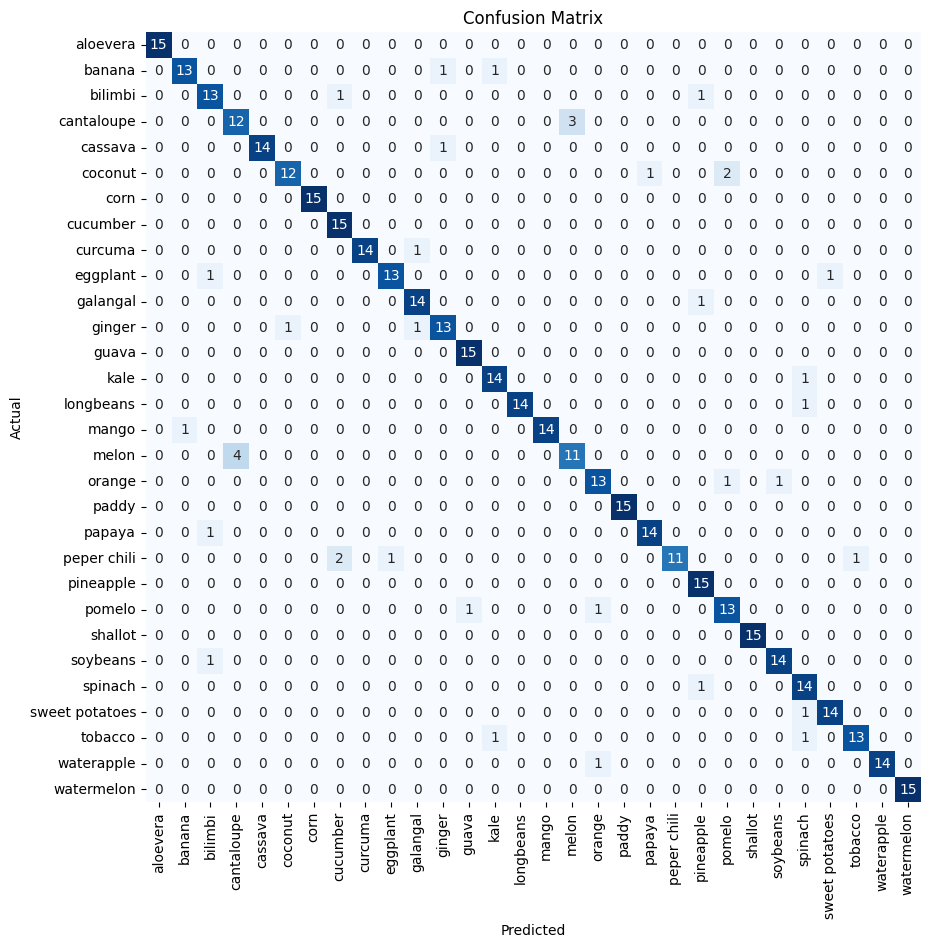

Classification report:
                 precision    recall  f1-score   support

      aloevera     1.0000    1.0000    1.0000        15
        banana     0.9286    0.8667    0.8966        15
       bilimbi     0.8125    0.8667    0.8387        15
    cantaloupe     0.7500    0.8000    0.7742        15
       cassava     1.0000    0.9333    0.9655        15
       coconut     0.9231    0.8000    0.8571        15
          corn     1.0000    1.0000    1.0000        15
      cucumber     0.8333    1.0000    0.9091        15
       curcuma     1.0000    0.9333    0.9655        15
      eggplant     0.9286    0.8667    0.8966        15
      galangal     0.8750    0.9333    0.9032        15
        ginger     0.8667    0.8667    0.8667        15
         guava     0.9375    1.0000    0.9677        15
          kale     0.8750    0.9333    0.9032        15
     longbeans     1.0000    0.9333    0.9655        15
         mango     1.0000    0.9333    0.9655        15
         melon     0.78

In [ ]:
def predictor(test_gen, test_steps):
    y_pred = []
    y_true = test_gen.labels
    classes = list(train_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        true_index = test_gen.labels[i]

        # Append every prediction, not just incorrect ones
        y_pred.append(pred_index)

        # Count errors
        if pred_index != true_index:
            errors += 1

    # Calculate accuracy
    acc = (1 - errors / tests) * 100
    print(f'There were {errors} errors out of {tests} tests for an accuracy of {acc:6.2f}%')

    # Convert lists to numpy arrays
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)

    # Generate and display confusion matrix if applicable
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        plt.figure(figsize=(10, 10))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count) + 0.5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + 0.5, classes, rotation=0)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    # Print classification report
    clr = classification_report(ytrue, ypred, target_names=classes, digits=4)
    print('Classification report:\n', clr)
    return errors, tests

# Run the predictor
errors, tests = predictor(test_gen, test_steps)


In [ ]:
class LR_ASK(keras.callbacks.Callback):
  def __init__(self, model, epochs, ask_epoch):
    super(LR_ASK, self).__init__()
    self.set_model(model)
    self.ask = ask_epoch
    self.epochs = epochs
    self.ask = True
    self.lowest_vloss = np.inf
    self.best_weights = self.model.get_weights()
    self.best_epoch = 1
    self.plist = []

    def get_list(self):
      return(self.plist)

In [ ]:
import json
import numpy as np

eager_tensor=tf.constant([2.0896919,2.1128857,1.1081853])
numpy_array=eager_tensor.numpy()
json_data=json.dumps(numpy_array.tolist())
print(json_data)

[2.0896918773651123, 2.1128857135772705, 1.1081852912902832]


In [ ]:
import os
import json
import numpy as np
import tensorflow as tf
from keras.models import load_model

subject = 'plants'
acc = str((1 - errors / tests) * 100)
index = acc.rfind('.')
acc = acc[:index + 3]

# Create the filename and path for saving the full model
save_id = subject + '_' + str(acc) + 'fruitsveg.h5'
model_save_loc = os.path.join(r'./', save_id)

# Before saving, convert any EagerTensors to NumPy arrays
def convert_eager_tensors_to_numpy(layer):
    for k, v in layer.__dict__.items():
        # Check if the attribute is a Tensor and is NOT a resource type
        if isinstance(v, tf.Tensor) and v.dtype != tf.dtypes.resource:
            layer.__dict__[k] = v.numpy()
        elif hasattr(v, '__dict__'):
            # Check if the attribute has already been visited to prevent infinite recursion
            if id(v) not in visited:
                visited.add(id(v))
                convert_eager_tensors_to_numpy(v)

visited = set()  # Keep track of visited objects to avoid recursion

for layer in model.layers:
    convert_eager_tensors_to_numpy(layer)

# Save the full model (architecture, weights, and optimizer state)
model.save(model_save_loc)

print("Full model was saved as:", model_save_loc)

Full model was saved as: ./plants_91.33fruitsveg.h5


In [ ]:
import keras
print(keras.__version__)


2.12.0
